In [10]:
import os
import yaml
import numpy as np
import scipy
from scipy.integrate import simps
import  matplotlib.pyplot as plt
from rubin_calib_etc import RubinCalibETC

## LED

In [11]:
config_file = os.path.join('config','led_ff_calib_etc.yaml')

In [12]:
with open(config_file) as f:
    config = yaml.safe_load(f)
    print(config)

{'light_source': 'LED', 'calib_type': 'Flatfield', 'LEDS': {'u': ['M375L4'], 'g': ['M455L4', 'M505L4'], 'r': ['M565L3', 'M660L4'], 'i': ['M730L5', 'M780LP1'], 'z': ['M850L3', 'M940L3'], 'y4': ['M970L4']}, 'dichroic_files': {'u': 'None', 'i': 'curv_69904.csv', 'g': 'DMLP490.csv', 'r': 'DMLP605.csv', 'z': 'DMLP900.csv', 'y4': 'None'}, 'coating_type': {'u': 'A', 'g': 'A', 'r': 'A', 'i': 'B', 'z': 'B', 'y4': 'B'}, 'snr': 1000, 'use_fiber': False, 'f_lsst': 10.3, 'pixel_size': 1e-05, 'm1': 'Al-Ideal', 'm2': 'Al-Ideal', 'm3': 'Al-Ideal', 'detector_file': 'detector_e2vPrototype.dat', 'total_number_of_pixels': 3200000000, 'cam_readout': 2, 'min_exptime': 15, 'electrometer_readout': 0, 'spectrograph_readout': 0, 'projector_mask_efficiency': 0.5, 'projector_design': ['collimator', 'converging_uncoated', 'mirror_ag_p01', 'mirror_ag_p01', 'mirror_ag_p01'], 'system_efficiency': 0.496, 'reflector_reflectance': 0.804, 'telescope_acceptance_ratio': 0.0001}


In [13]:
ETC = RubinCalibETC(config_file)

In [14]:
ETC.get_photons_per_pixel()

{'u': 255.0, 'g': 119.0, 'r': 102.0, 'i': 102.0, 'z': 102.0, 'y4': 255.0}

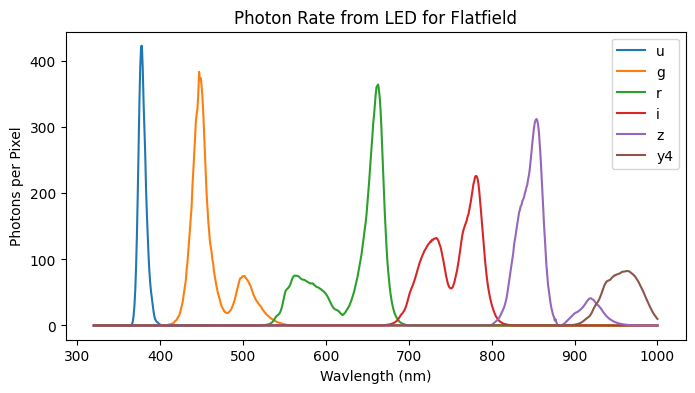

In [15]:
ETC.get_total_exptime()
ETC.plot_photon_rate()
plt.savefig('led_ff_photon_rate.png')
ETC.total_exptimes

In [16]:
ETC.total_exptimes

{'u': 255.0, 'g': 119.0, 'r': 102.0, 'i': 102.0, 'z': 102.0, 'y4': 255.0}

In [17]:
ETC.filters

{'u': [324, 395.0],
 'g': [405, 552],
 'r': [552, 691],
 'i': [691, 818],
 'z': [818, 921],
 'y4': [922, 997]}

In [18]:
#Integrated Photon Rates
for filter_name, ph in ETC.photons_per_pixel.items():
    filter_wave = np.linspace(ETC.filters[filter_name][0], ETC.filters[filter_name][1], 
                              int(ETC.filters[filter_name][1]-ETC.filters[filter_name][0]) + 1)
    f = scipy.interpolate.interp1d(ETC.rubin_wavelength, ph)
    integrated_ph_count = simps(f(filter_wave), filter_wave)
    print(filter_name, integrated_ph_count)

u 4602.9800742526895
g 10764.10646558494
r 12694.556864686925
i 11914.89413598796
z 10287.762061965763
y4 4446.32958071565


## Laser

In [10]:
config_file = os.path.join('config','laser_ff_calib_etc.yaml')
ETC = RubinCalibETC(config_file)

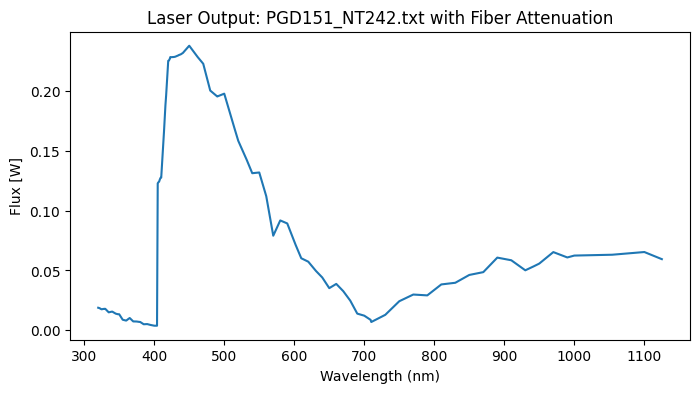

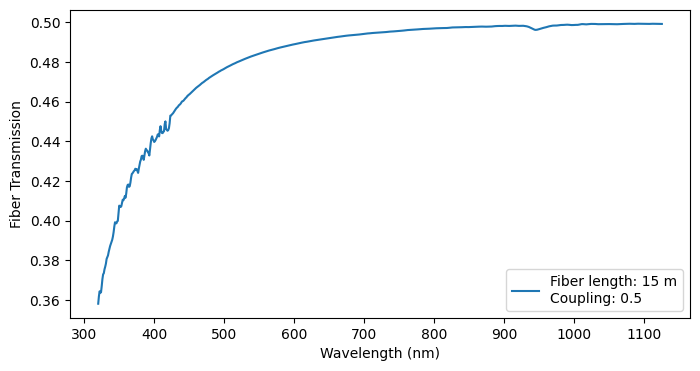

In [11]:
ETC.plot_lightsource_output(fiber_plot=True)

In [12]:
ret = ETC.get_total_exptime()

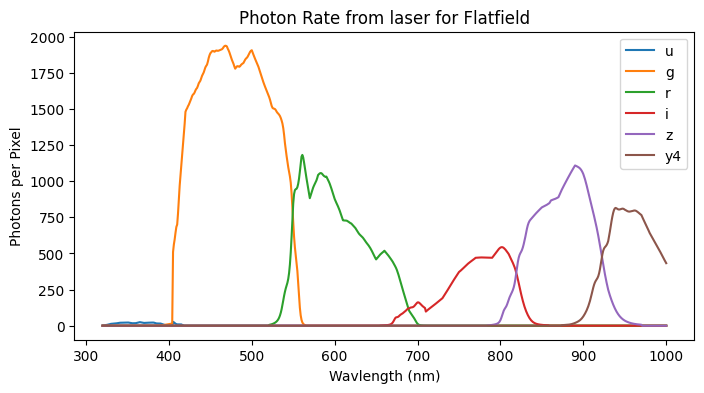

In [13]:
ETC.plot_photon_rate()
plt.savefig('laser_ff_photon_rate.png')

In [14]:
for filter_name, total in ETC.total_exptimes.items():
    print(filter_name, total/60.)

u 903.55
g 43.63333333333333
r 67.43333333333334
i 115.31666666666666
z 35.13333333333333
y4 30.033333333333335


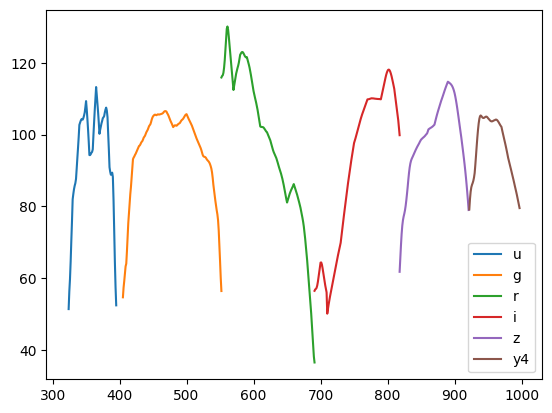

In [16]:
#For laser
for filter_name, ph in ETC.photons_per_pixel.items():
    filter_wave = np.linspace(ETC.filters[filter_name][0], ETC.filters[filter_name][1], 
                              int(ETC.filters[filter_name][1]-ETC.filters[filter_name][0]) + 1)
    f = scipy.interpolate.interp1d(ETC.rubin_wavelength, ph)
    med_ph_rate = np.median(f(filter_wave))
    med_exptime = ETC.get_exptime(med_ph_rate, 100)
    med_snr = ETC.get_snr(f(filter_wave), med_exptime)
    plt.plot(filter_wave, med_snr, label=f'{filter_name}')
plt.legend()

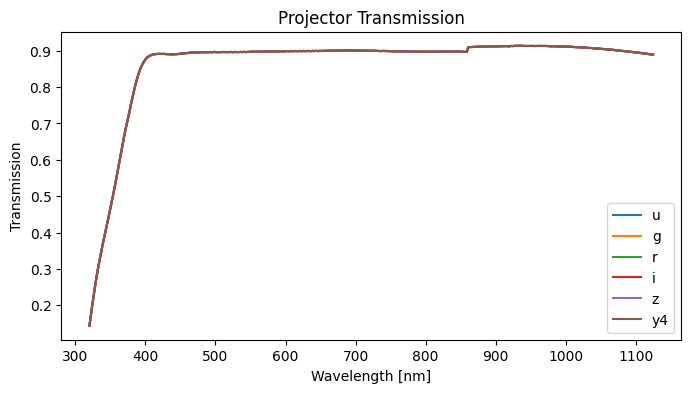

In [18]:
ETC.plot_projector_transmission()

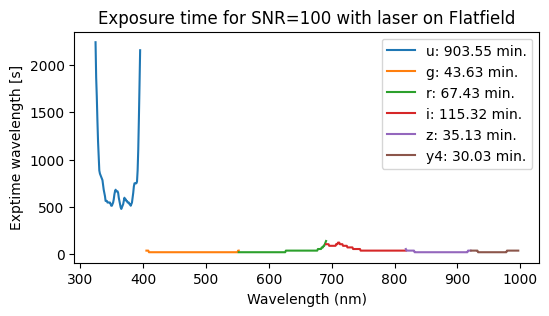

In [15]:
ETC.plot_exptime()
plt.savefig('laser_ff_totalexptime.png')